In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db = pd.read_csv('netflix_titles_2021.csv')

In [3]:
db.head()
# db.columns.size
# db.columns

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# db.describe()
# count : non empty
db.shape
# info about rows and cols

(8807, 12)

In [5]:
# db.info
# shows data type, memory , indexes
db.dtypes
# show data type

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
# to show duplicate db
db[db.duplicated()]
# db.drop_duplicates(inplace = 'True')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [7]:
# db.isnull()
# DATA CLEANING
db.isnull().mean()*100
# db.isnull().sum()

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

<Axes: >

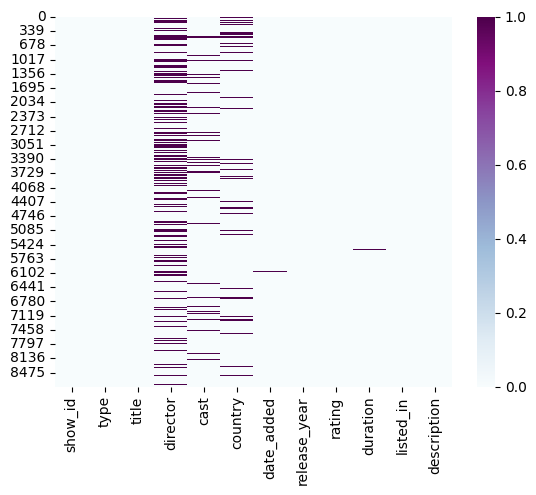

In [8]:
sns.heatmap(db.isnull(), cmap = 'BuPu')

In [9]:
# takes previous value.
# db.fillna(method = 'pad')
# take after value
# db.fillna(method = 'bfill')
db['director'].fillna("unknown" , inplace = True)
db['cast'].fillna("unknown" , inplace = True)
db['country'].fillna("unknown" , inplace = True)
db['country'].isnull().sum()

0

In [10]:
# learn about interpolate
# drop if one null value in row. Few cols that have few Nan value
db.dropna(inplace = True)
# if whole row is null
# db.dropna(how = 'all')
# drop if one null value in col.
# db.dropna(axis = 1)
# new_db = db.dropna(axis = 0)
db.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
# To determine  SHOW ID AND THE DIRECTOR OF THE SHOW FOR ' Ganglands' 
db[db['title'].isin(['Ganglands'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [12]:
#  Question 2 : In which year highest no of TV shows/movies were released?
# yearly_counts = db['release_year'].value_counts()
# yearly_counts.plot(kind='bar', color='green')
# plt.xlabel('Release Year')
# plt.ylabel('Number of TV Shows/Movies')
# plt.title('Number of TV Shows/Movies Released Each Year')
# plt.show()

In [13]:
# To captilize first word.
# Syntax: lambda arguments: expression
db['country'] = db['country'].apply(lambda x : x.capitalize())
db['country']

0       United states
1        South africa
2             Unknown
3             Unknown
4               India
            ...      
8802    United states
8803          Unknown
8804    United states
8805    United states
8806            India
Name: country, Length: 8790, dtype: object

In [14]:
# to split date, month, year
db[['release_year', 'date_added']]
# to get date, using if cause many times structure is not like we want 
# db['added_month'] = db['date_added'].apply(lambda x:x.split(',')[1].split()[1] if len(x.split(',')[1].split()) > 1 else None)
db['added_month'] = db['date_added'].apply(lambda x:x.split(',')[0].split()[0])
db['added_year'] = db['date_added'].apply(lambda x:x.split(',')[1])
db[['added_month', 'added_year', 'release_year']]

,added_month,added_year,release_year
0,September,2021,2020
1,September,2021,2021
2,September,2021,2021
3,September,2021,2021
4,September,2021,2021
...,...,...,...
8802,November,2019,2007
8803,July,2019,2018
8804,November,2019,2009
8805,January,2020,2006


In [15]:
# dropping date_added col no longer needed.
# db.drop('date_added',axis=1,inplace= True)
# now to make int to added_year
db['added_year']= db['added_year'].astype(int)
db['release_year'] = db['release_year'].astype(int)

In [16]:
# we need to make sure added_year should not be less than release year
# inplace makes sure that og data content is getting deleted
db.drop(db[db['added_year']<db['release_year']].index, inplace = True)

In [17]:
# ANALYZING
db['type'].value_counts()

type
Movie      6124
TV Show    2652
Name: count, dtype: int64

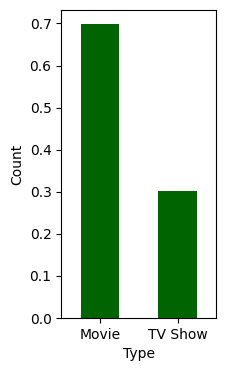

In [18]:
# normalize gives answers in %
db['type'].value_counts(normalize=True).plot.bar(color = 'darkgreen')
plt.xticks(rotation=360)
plt.gcf().set_size_inches(2, 4)
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [19]:
# director that posted the most movie
db['director'].value_counts()

director
unknown                           2610
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Marcus Raboy                        16
Suhas Kadav                         16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4524, dtype: int64

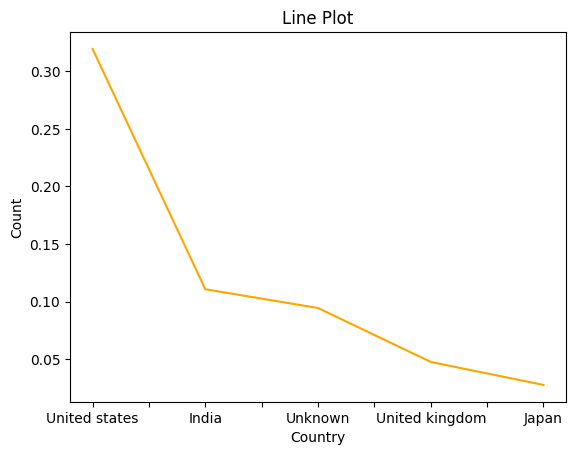

In [20]:
# db['country'].value_counts()[:5]
db['country'].value_counts(normalize= True)[:5].plot.line(color = "orange")
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Line Plot')
plt.show()

<Axes: xlabel='added_year', ylabel='Density'>

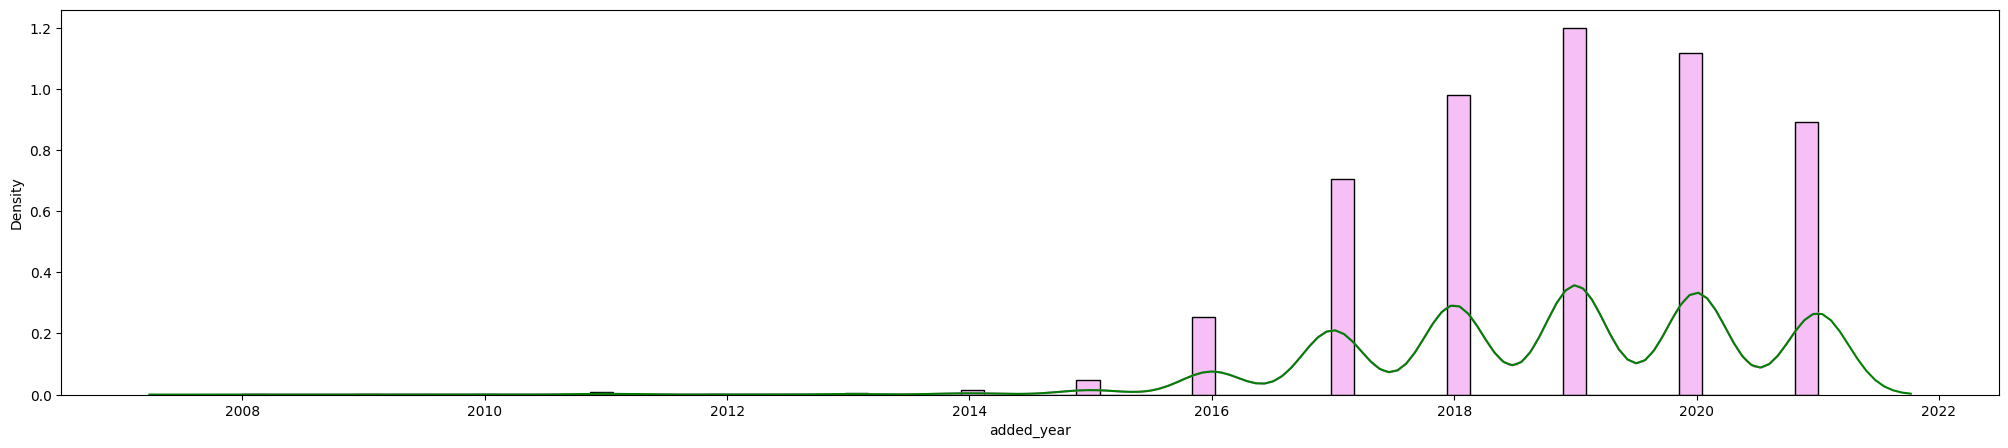

In [21]:
# sns.distplot(db['added_year']) no longer used.
plt.figure(figsize=(25, 5))
sns.histplot(db['added_year'], kde=True, stat="density", color='violet')
sns.kdeplot(db['added_year'], color='green')

<Axes: xlabel='added_year', ylabel='count'>

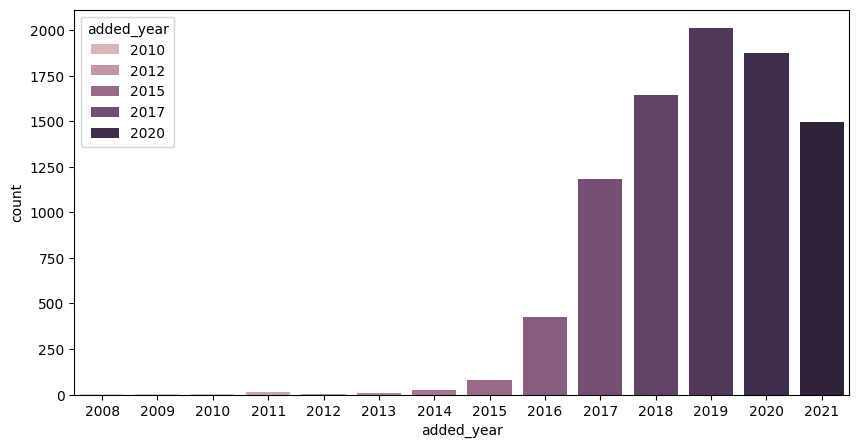

In [22]:
plt.figure(figsize=(10,5))
sns.set_palette("Set1")
sns.countplot(x = db['added_year'], hue=db['added_year'])

C:\Users\gaura\AppData\Local\Temp\ipykernel_7544\1847207786.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= value_counts.index, y=value_counts.values, order=month_order, palette= colors)


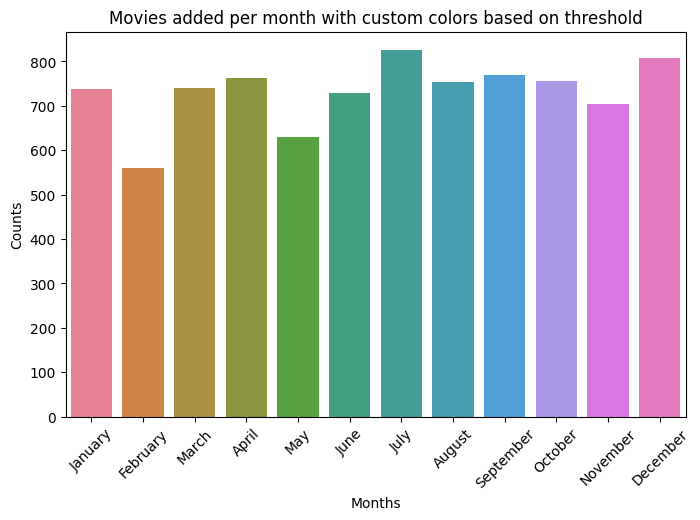

In [23]:
# Now same thing with months
value_counts = db['added_month'].value_counts()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(8, 5))
plt.xticks(rotation=45)
# colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightseagreen', 'lightsalmon', 'lightsteelblue', 'lightyellow']/
colors = sns.color_palette("husl", len(month_order))
sns.barplot(x= value_counts.index, y=value_counts.values, order=month_order, palette= colors)
plt.xlabel('Months')
plt.ylabel('Counts')
plt.title('Movies added per month with custom colors based on threshold')
plt.show()

In [24]:
# to check with ratings
db['rating'].value_counts()
db['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

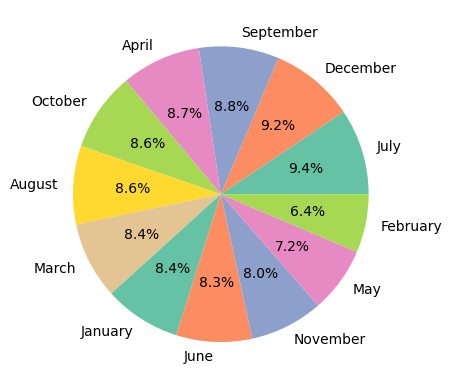

In [25]:
values = db['rating'].value_counts()
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494']
# autopct for %
plt.pie(value_counts, labels=value_counts.index,autopct='%1.1f%%', colors = colors)
plt.show()

In [26]:
db['listed_in'].value_counts()

listed_in
Dramas, International Movies                                   362
Documentaries                                                  359
Stand-Up Comedy                                                333
Comedies, Dramas, International Movies                         274
Dramas, Independent Movies, International Movies               252
                                                              ... 
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
International TV Shows, TV Horror, TV Sci-Fi & Fantasy           1
Crime TV Shows, Kids' TV                                         1
Horror Movies, International Movies, Sci-Fi & Fantasy            1
Cult Movies, Dramas, Thrillers                                   1
Name: count, Length: 513, dtype: int64

In [27]:
db['genre_1'] = db['listed_in'].apply(lambda x : x.split(",")[0])
db['genre_2'] = db['listed_in'].apply(lambda x : x.split(",")[1] if len(x.split(",")) > 1 else '')
db['genre_3'] = db['listed_in'].apply(lambda x : x.split(",")[2] if len(x.split(",")) > 2 else '')

In [28]:
db[['genre_1','genre_2','genre_3']]
db.drop('listed_in',axis =1,inplace =True)

In [29]:
db['genre_1'].value_counts()

genre_1
Dramas                          1599
Comedies                        1210
Action & Adventure               858
Documentaries                    829
International TV Shows           771
Children & Family Movies         605
Crime TV Shows                   397
Kids' TV                         383
Stand-Up Comedy                  333
Horror Movies                    275
British TV Shows                 252
Docuseries                       219
Anime Series                     174
International Movies             128
Reality TV                       119
TV Comedies                      115
Classic Movies                    80
TV Dramas                         67
Thrillers                         65
Movies                            53
TV Action & Adventure             39
Stand-Up Comedy & Talk Shows      34
Romantic TV Shows                 32
Anime Features                    21
Independent Movies                20
Classic & Cult TV                 20
Music & Musicals              

C:\Users\gaura\AppData\Local\Temp\ipykernel_7544\687032345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = db['genre_1'][:6],palette='rocket')


<Axes: xlabel='genre_1', ylabel='count'>

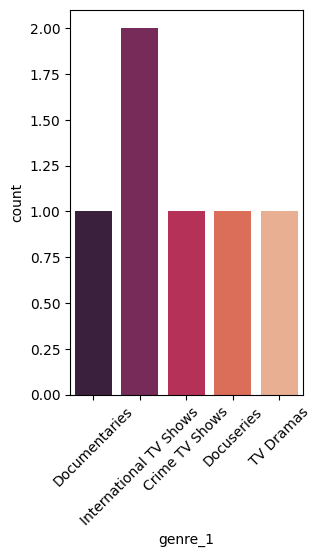

In [30]:
plt.figure(figsize=(3,5))
plt.xticks(rotation = 45)
sns.countplot(x = db['genre_1'][:6],palette='rocket')

<Axes: xlabel='country', ylabel='count'>

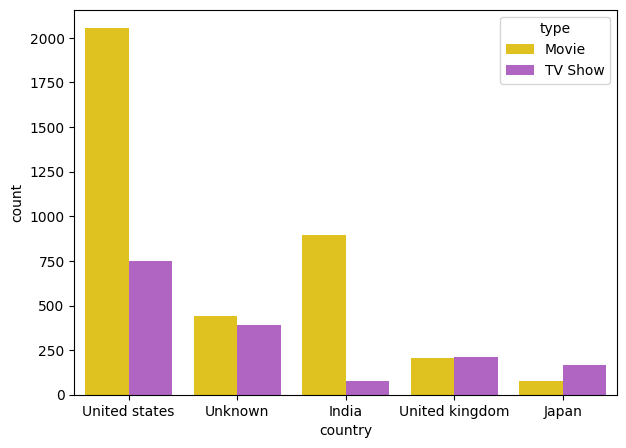

In [51]:
temp_db = db[db['country'].isin(db['country'].value_counts()[:5].index)]
plt.figure(figsize = (7,5))
colors = ["gold", "mediumorchid"]
sns.countplot(data=temp_db,x='country',hue='type',palette=colors)

In [55]:
list(db['country'].value_counts()[:5].index)

['United states', 'India', 'Unknown', 'United kingdom', 'Japan']

C:\Users\gaura\AppData\Local\Temp\ipykernel_7544\2432468800.py:2: UserWarning: 
The palette list has fewer values (5) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=temp_db,x='country',hue='rating', palette = colors)


<Axes: xlabel='country', ylabel='count'>

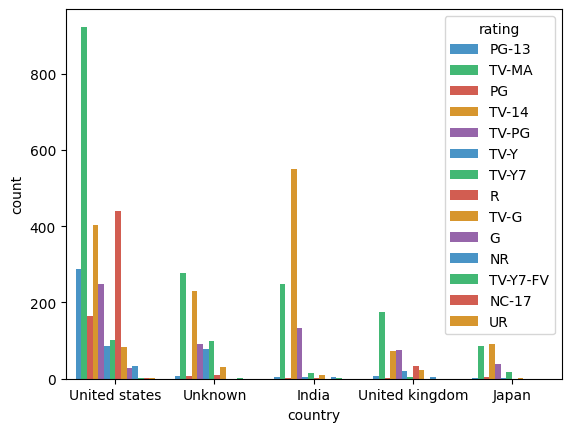

In [58]:
colors = ["#3498db", "#2ecc71", "#e74c3c", "#f39c12", "#9b59b6"]
sns.countplot(data=temp_db,x='country',hue='rating', palette = colors)

C:\Users\gaura\AppData\Local\Temp\ipykernel_7544\315071816.py:2: UserWarning: 
The palette list has fewer values (5) than needed (34) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=temp_db,x='country',hue='genre_1', palette = colors)


<Axes: xlabel='country', ylabel='count'>

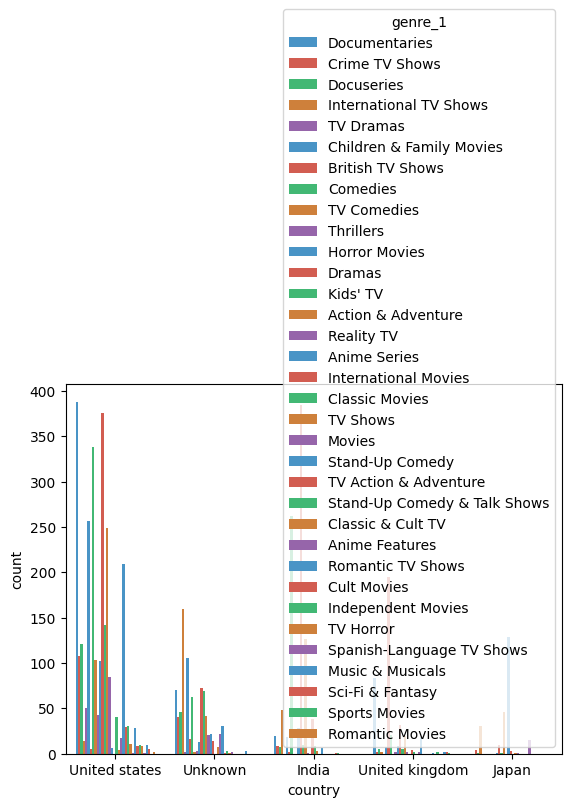

In [65]:
colors = ["#3498db", "#e74c3c", "#2ecc71", "#e67e22", "#9b59b6"]
sns.countplot(data=temp_db,x='country',hue='genre_1', palette = colors)

#SUMMARY

In [ ]:
# TRIAL AND ERROR